In [1]:
from __future__ import print_function
import os
from time import time
from os import listdir
from os.path import isdir

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
SPINE_COLOR = 'gray'

%matplotlib inline

base_dir = '/home/doaa/Documents/Spring2016_SE_Project/'


/home/doaa/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Constants
NUM_TOPICS = 50
max_df = 0.7
min_df = 0.3
# suffix = str(max_df)+'_'+str(min_df) # for 10
lang = 'categories_fixed_'
# lang = 'all_'
# lang = ''
suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)

categories_fixed_50_0.7_0.3


In [11]:
proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'), index_col=0)
#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())
# To date
proj_topic.date = pd.to_datetime(proj_topic.date)
proj_topic.sort_values('date', inplace=True)
print(proj_topic.shape)
proj_topic.head()

(103, 52)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23,topic24,topic25,topic26,topic27,topic28,topic29,topic30,topic31,topic32,topic33,topic34,topic35,topic36,topic37,topic38,topic39,topic40,topic41,topic42,topic43,topic44,topic45,topic46,topic47,topic48,topic49,project,date
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0hh1,8.076291e-02,1.933535e-01,1.044262e-05,1.044262e-05,5.652664e-02,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,2.002363e-01,1.044262e-05,1.044262e-05,1.000000e+00,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,3.619176e-01,1.044262e-05,1.044262e-05,1.044262e-05,1.044262e-05,7.311322e-03,1.044262e-05,1.044262e-05,0hh1,2016-01-01
oryx,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,5.857817e-03,7.247990e-07,7.247990e-07,1.000000e+00,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,5.492668e-03,7.247990e-07,7.247990e-07,7.247990e-07,7.247990e-07,oryx,2016-01-01
openage,6.223315e-03,4.081960e-06,2.335174e-02,4.081960e-06,4.081960e-06,2.216198e-02,4.792528e-02,4.081960e-06,4.081960e-06,1.000000e+00,4.081960e-06,2.152940e-01,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,1.514408e-02,4.081960e-06,4.081960e-06,7.046211e-02,4.081960e-06,4.081960e-06,1.872439e-01,4.081960e-06,4.261168e-02,7.738038e-02,7.589488e-02,4.081960e-06,4.081960e-06,2.769981e-02,1.422352e-01,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,8.730166e-02,4.081960e-06,4.081960e-06,4.081960e-06,1.129812e-01,4.081960e-06,4.081960e-06,4.081960e-06,4.081960e-06,openage,2016-01-01
nupic,1.898631e-04,1.823125e-07,6.411181e-04,2.795129e-01,1.823125e-07,1.823125e-07,1.890298e-03,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,6.888266e-03,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.678562e-02,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,7.288519e-05,1.890865e-02,1.000000e+00,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,4.091544e-03,1.823125e-07,1.324922e-02,1.823125e-07,1.823125e-07,1.823125e-07,3.575179e-04,1.823125e-07,1.823125e-07,1.394577e-03,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,1.823125e-07,nupic,2016-01-01
neon,1.368727e-06,1.422143e-01,1.368727e-06,1.110224e-01,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,2.770671e-01,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,2.944359e-02,1.000000e+00,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,1.368727e-06,4.163184e-02,1.368727e-06,1.368727e-06,2.416712e-03,1.368727e-06,1.368727e-06,1.368727e-06,1.695067e-01,5.396079e-02,1.368727e-06,neon,2016-01-01


In [12]:
topics = pd.read_csv(os.path.join(base_dir, 'results/topic_word_'+suffix+'.csv'), index_col=0)
topics_freq = pd.read_csv(os.path.join(base_dir, 'results/topic_word_freq_'+suffix+'.csv'), index_col=0)

topics.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,summari,game,vertex,textur,assert,draw,resourc,button,graphic,devic,matrix,softwar,assembl,dispos,framework,obj,tool,microsoft,bitmap,bit,blend,sound,platform,pixel,compress,po,reader,contributor,rectangl,vertic,term,batch,rect,menu,enumer,clone,region,net,sender,mous,channel,app,contribut,audio,icon,subject,writer,angl,plugin,grant
topic#1,train,doubl,framework,abstract,score,cluster,predict,exp,flat,metric,dataset,apach,assert,conf,critic,logger,classifi,db,regress,parallel,transpos,concurr,warranti,agre,unless,rate,govern,complianc,obtain,matrix,softwar,basi,permiss,statist,repo,tail,infer,illeg,databas,varianc,2013,reject,learn,2016,accuraci,str,topic,popul,interfac,sum
topic#2,chart,dataset,axi,2015,radiu,accessor,legend,mixin,grid,bar,anim,domain,tooltip,box,draw,coordin,hover,bubbl,horizont,angl,eas,rect,redraw,prototyp,pixel,rotat,month,mock,stroke,extent,vertic,opac,year,interpol,moment,circl,rectangl,dash,plot,polygon,axe,zoom,anchor,day,canva,ordin,footer,famili,week,wiki
topic#3,axe,figur,bbox,plot,draw,axi,canva,patch,backend,angl,button,grid,vertic,tran,dict,func,mask,clip,marker,formatt,legend,major,tool,shape,arrow,norm,python,extent,coordin,rotat,tupl,interpol,segment,baselin,minor,scalar,triangl,vert,aspect,spec,widget,box,pixel,datetim,coord,xmin,fname,rectangl,unicod,press
topic#4,prototyp,builtin,session,elem,fn,entiti,expr,plugin,javascript,selector,bucket,exp,hook,statement,fragment,promis,splice,liter,editor,onload,css,emit,obj,cur,ajax,symbol,dep,indent,circl,auth,reject,defer,dest,web,cursor,func,assert,shape,blur,grid,div,packag,old,el,sandbox,xml,po,toggl,score,uri
topic#5,dom,shape,softwar,devic,light,textur,extent,vertex,world,materi,collis,vert,po,profil,scene,plane,draw,ctrl,techniqu,ref,rect,poli,mask,scalar,matrix,game,box,platform,mous,triangl,camera,obj,asset,assert,face,axi,cast,thread,vertic,bitmap,menu,ts,shadow,veloc,fn,physic,const,constraint,pipelin,anim
topic#6,cursor,menu,fname,mous,alloc,widget,fold,ctrl,strlen,scroll,button,scheme,redraw,visual,dialog,mask,retval,dict,scrollbar,unus,shell,clip,eval,proto,argv,spell,highlight,proc,indent,magic,draw,term,pixel,region,icon,utf8,func,unix,undo,conv,python,rect,spin,silent,expr,verbos,pend,score,signal,choic
topic#7,world,summari,0x,game,packag,builder,assert,button,scene,session,po,matrix,softwar,room,textur,shape,draw,asset,ff,func,resourc,cursor,templat,prototyp,say,dict,light,vertex,plugin,def,underscor,dir,selector,nbsp,anim,platform,apach,permiss,password,water,thread,cost,email,learn,owner,kernel,cur,dead,elem,editor
topic#8,0x,assert,apach,softwar,matrix,entiti,tile,proxi,geometri,textur,camera,button,vertex,draw,ptr,cursor,js,widget,anim,scene,func,rectangl,primit,kernel,prototyp,warranti,writabl,shape,scroll,resourc,doubl,vertic,permiss,lang,cluster,dir,int32,bit,devic,session,axi,io,train,complianc,interfac,materi,world,reader,graphic,mock
topic#9,world,player,game,mod,po,widget,attack,owner,softwar,palett,tile,button,sound,face,draw,anim,power,region,resourc,play,upgrad,foundat,term,public,2016,publish,2007,panel,enumer,vec,func,damag,preview,scroll,mous,notifi,dictionari,nbsp,mini,builder,dead,room,cursor,self,cost,sub,radiu,graphic,tooltip,overlay


In [13]:
topics_freq.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,21552.380742,12294.977098,6516.738818,6087.294924,6008.147986,5594.012586,5290.001568,5289.798400,4772.104689,4576.230139,3866.929345,3814.044308,3584.157071,3300.099370,2968.472459,2840.668431,2539.777863,2535.010642,2472.614617,2470.533654,2346.700896,2340.764185,2272.507973,2195.889996,2056.320288,2042.780268,1995.085363,1952.739560,1937.833696,1859.795900,1824.828001,1799.496583,1798.512699,1746.143779,1681.945800,1677.732171,1643.300253,1638.065524,1623.704036,1593.158061,1590.655542,1578.413370,1572.495197,1543.811222,1513.794156,1493.737882,1447.199279,1434.320483,1426.370231,1410.292864
topic#1,3018.007977,2094.684938,1743.974247,1491.574937,1480.581860,1394.327717,1306.569099,1111.873326,1013.680930,970.754847,835.963402,787.986338,709.008214,678.672764,642.677354,623.417016,623.220100,559.108645,488.228487,484.780481,453.292177,422.611858,413.426374,402.635266,395.889444,391.970846,387.552412,387.501089,386.260517,386.256988,385.095678,383.580265,383.401906,358.832466,356.961762,351.703546,343.959871,323.648418,319.840535,310.804425,303.014625,300.244412,289.773816,285.102901,256.297711,249.886194,231.765295,226.089239,222.634903,219.724973
topic#2,18341.452165,3420.835441,3263.238821,2160.031477,2064.837104,1767.811910,1336.989451,1170.438607,1165.500533,1005.301985,1003.275646,958.597555,901.162246,885.822222,850.494446,816.956461,796.703976,791.428660,789.899194,741.478561,657.818598,630.163340,615.681301,601.977527,593.986468,588.535777,568.024085,563.377521,546.539774,512.769186,491.017431,471.017471,470.394976,468.844232,457.430042,381.149283,369.869437,368.743322,365.452224,359.955590,356.718175,347.583932,345.135047,335.600663,334.861755,334.208451,328.229774,316.916961,314.004358,310.078037
topic#3,6235.265531,5486.041714,3248.586988,3074.848605,2933.240467,2738.479903,2701.983747,2194.790166,2013.597121,1561.971310,1549.284769,1501.351430,1458.236615,1395.352274,1388.582608,1281.345967,1264.394704,1215.646463,1155.210228,1032.639480,1021.246985,990.263248,973.490822,958.739392,901.985059,899.484445,878.169294,815.404161,766.874134,760.070107,758.805069,756.978822,748.874355,744.947632,699.357719,697.737196,695.966074,680.650071,649.395998,626.335484,625.274395,625.146049,618.756166,609.317805,604.389451,600.308437,554.858692,553.049607,550.605080,538.071200
topic#4,4952.281853,3150.934639,1983.028334,1916.472203,1335.569827,1261.574867,820.555905,695.456570,569.706938,554.765624,544.678245,516.242672,497.363559,488.676729,463.887915,443.751929,423.762859,404.091853,398.648673,396.702223,380.475929,357.737437,357.069959,355.183022,345.839321,344.782522,344.758936,343.221652,329.021107,328.516726,326.947159,324.221133,323.803667,322.292931,310.492953,304.230034,300.710340,299.382319,294.304734,287.097517,261.574632,258.842300,250.969874,246.262412,246.172340,239.289671,233.269567,231.181234,228.161762,225.063022
topic#5,16977.412600,12896.706079,10435.105442,9004.762236,8604.997097,8045.011200,7707.377806,7007.451809,6864.695178,6597.219987,6358.715635,5782.739558,5501.018444,5439.098869,5341.978631,5094.773518,4911.063115,4768.566552,4699.988444,4687.556090,4337.535201,4295.049977,4065.640962,4050.205359,4025.473494,3994.329795,3618.628226,3522.983315,3487.625643,3447.941503,3365.754724,3287.874983,3258.531557,3242.976844,3200.584124,3138.241191,3060.516342,2994.404151,2847.666753,2727.325804,2717.169946,2711.316072,2686.015534,2603.175456,2464.112084,2455.893502,2445.691078,2426.695783,2399.687077,2391.546353
topic#6,5240.759732,3916.551173,2996.217886,2228.811861,1967.204955,1952.048949,1795.631748,1668.900600,1535.288774,1516.077335,1398.811037,1226.574676,1034.9

/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


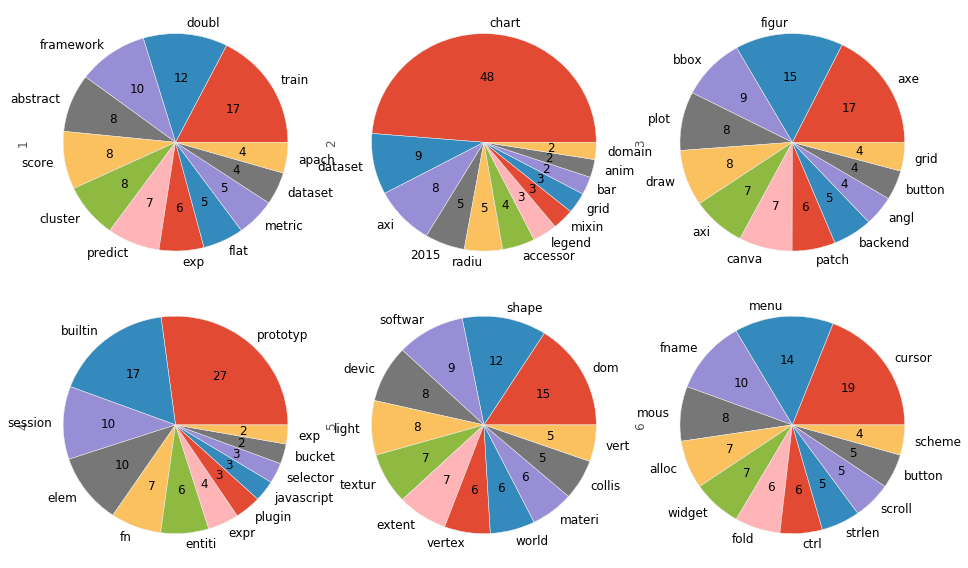

In [14]:
fig = plt.figure(1, figsize=(13,8))

df = topics_freq.reset_index(level=0)
df = df.drop('index', axis=1).T[0:12]
df
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    df[i].astype(float).plot.pie(ax=ax, label=None, fontsize=12,
                    labels=topics.T.ix[0:12, i], autopct='%.d')
plt.tight_layout()
fig.savefig('topic-word'+suffix+'.png', bbox_inches='tight', dpi=350)

/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


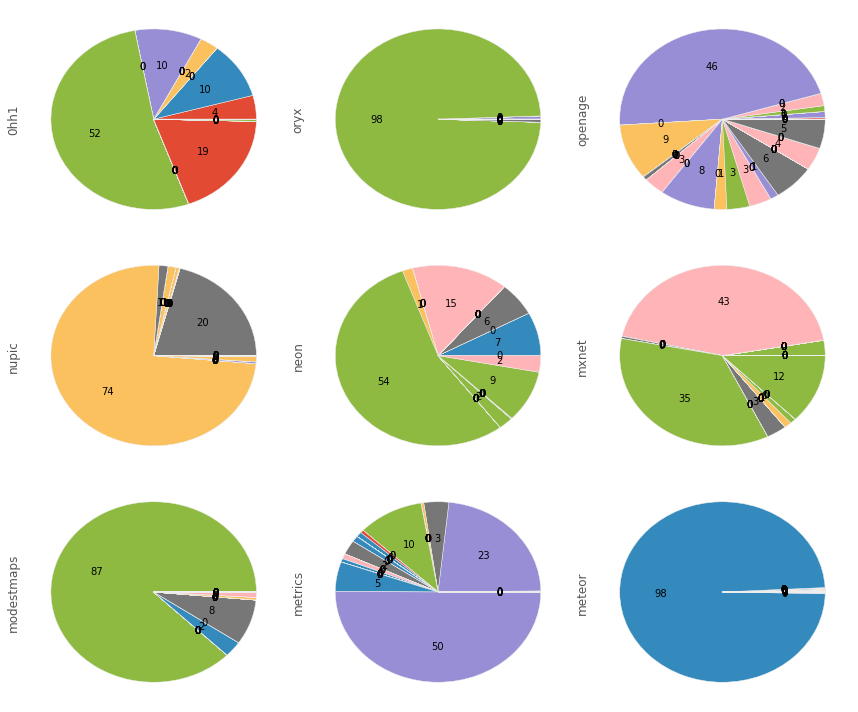

In [15]:
latests_projects = proj_topic[proj_topic.date == "2016-01-01"].copy()
to_remove = ['express', 'derby', 'flask', 'symfony']
latests_projects = latests_projects[~latests_projects.project.isin(to_remove)]

# latests_projects[latests_projects.columns[0:NUM_TOPICS]] = latests_projects[latests_projects.columns[0:NUM_TOPICS]].applymap(lambda x: 0 if x>0.99 else x*100)
# latests_projects

fig = plt.figure(1, figsize=(12,10))

df = latests_projects.reset_index(level=0)
df.set_index('project', inplace=True)
df = df.drop('index', axis=1).T[0:NUM_TOPICS-1]
df
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    df.ix[:, i-1].astype(float).plot.pie(ax=ax, autopct='%.d',
                    labels=None#df.index.values
                                )

# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, df.index.values, loc='lower center',  ncol=5, bbox_to_anchor=(0.4, 0.02))
    
plt.tight_layout()
plt.savefig('project-topic'+suffix+'.png', dpi=400)


# 1- Each project evolution over time

9
Rows:  3
cakephp (22, 12)
django (21, 12)
frappe (9, 12)
pakyow (9, 12)
rails (23, 12)
sinatra (17, 12)
spring (15, 12)
symfony (12, 12)
web2py (9, 12)
project_time10_0.7_0.4.png


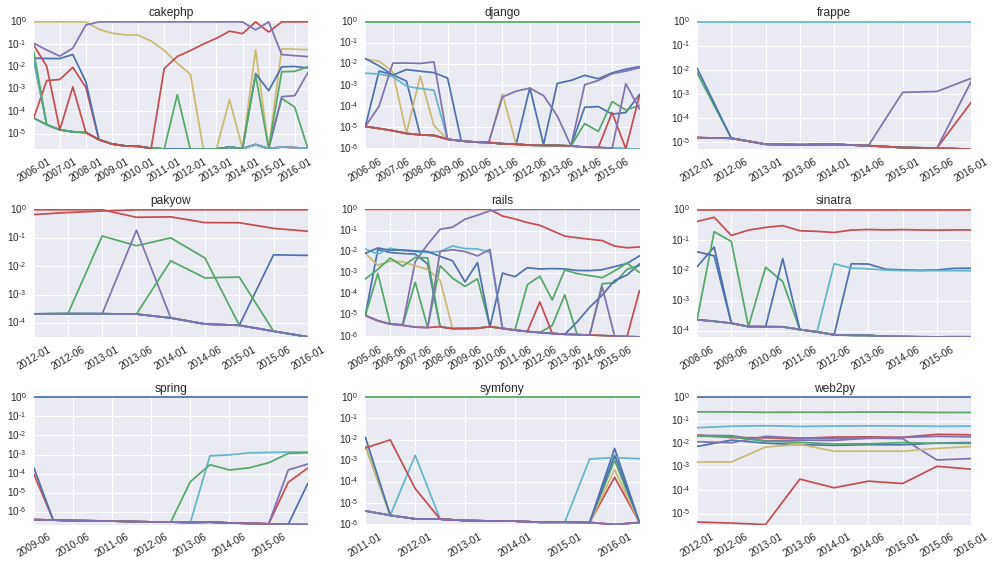

In [94]:
#Remove projects with unsuffient data
fig = plt.figure(3, figsize=(14,8))
to_remove = ['express', 'derby', 'flask', 'CodeIgniter', 'laravel']
temp = proj_topic[~proj_topic.project.isin(to_remove)]
proj_topic.shape

groups = temp.groupby('project')

i=1
print(groups.ngroups)
rows = int(groups.ngroups/3)
print('Rows: ', rows)
for name, p in groups:    
    ax = fig.add_subplot(rows,3,i)
    i+=1
    ax = p[proj_topic.columns[0:NUM_TOPICS]].plot(logy=True, ax=ax)
    ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    if p.shape[0] >10:
        ax.set_xticklabels([c for o,c in enumerate(p['date'].dt.strftime( "%Y-%m")) if o%2!=0])
        ax.set_xticks(np.arange(0, p.shape[0], 2))
    else:
        ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30)
    ax.set_title(name)
    ax.legend([])
    ax.set_ylim([-0.1, 1.1])
    print(name, p.shape)
#     if i==13:
#         break

plt.tight_layout()
fig.savefig('project_time'+suffix+'.png', dpi=350)
print('project_time'+suffix+'.png')

In [73]:
# proj_topic[proj_topic['project']=='django']


In [74]:
# proj_topic

In [75]:
# groups = proj_topic.groupby('date')#.sum()

# for i, g in groups:
#     print(i, g.sum())
# ax = groups.plot()
# ax.legend(bbox_to_anchor=(1.3, 1))
# ax.set_yticklabels([])
# ax.set_ylabel('density')

(23, 10)


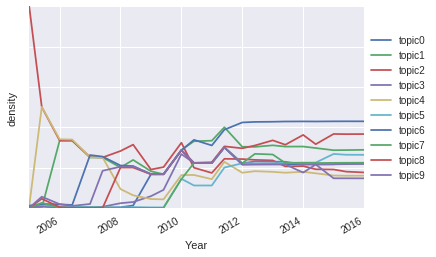

In [103]:
fig = plt.figure(5, figsize=(7,4))
groups = proj_topic.groupby('date').mean()
print(groups.shape)

ax = groups.plot(figsize=(6,4))
ax.legend(bbox_to_anchor=(1.21,.9))
# ax.legend([])
ax.set_yticklabels([])
ax.set_ylabel('density')
ax.set_xlabel('Year')

# plt.tight_layout()
plt.savefig('topic_time'+suffix+'.png', bbox_inches='tight', dpi=350)

In [12]:

# proj_topic[proj_topic.date=='2016-01-01']

In [13]:
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
# for i, k in enumerate([0, 5, 9, 14, 19]):
#     ax[i].stem(topics.ix[k,:], linefmt='b-',
#                markerfmt='bo', basefmt='w-')
#     ax[i].set_xlim(-50,4350)
#     ax[i].set_ylim(0, 0.08)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("topic {}".format(k))

# ax[4].set_xlabel("word")

# plt.tight_layout()


In [14]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(7, 1, figsize=(8, 12), sharex=True)
# for i in range(7):
#     ax[i].stem(df.ix[i,0:10], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
#     ax[i].set_xlim(-1, 21)
#     ax[i].set_ylim(0, 1)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("{}".format(df.ix[i,10]))

# ax[6].set_xlabel("Topic")

# plt.tight_layout()
# plt.show()
# plt.savefig('project_topc'+suffix+'.png', bbox_inches='tight', dpi=350)

In [15]:
proj_topic.head()
# df = proj_topic[proj_topic.date=='2016-01-01']

# a = {}
# for i in range(NUM_TOPICS):
#     a[i] = df[df.ix[:,i]>0.8].project#.ix[:, 10:12]
#     print(len(a[i]))
#     a[i] = np.unique(a[i])
# a


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.000040,1.000000,0.036886,0.168486,2.833255e-02,4.023518e-05,0.397630,0.000040,0.000040,0.000040,0hh1,2016-01-01
oryx,0.000005,0.000005,0.000005,1.000000,1.796732e-02,6.145838e-01,0.000005,0.000005,0.000005,0.010188,oryx,2016-01-01
openage,0.000016,0.047340,0.075629,0.143267,1.804724e-01,1.639160e-05,1.000000,0.000016,0.320174,0.001464,openage,2016-01-01
nupic,0.000243,0.018537,0.274313,1.000000,9.312631e-07,9.312607e-07,0.105727,0.000527,0.005452,0.160423,nupic,2016-01-01
neovim,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,neovim,2016-01-01


# Clustering Analysis

In [71]:
# Constants
NUM_TOPICS = 10
max_df = 0.7
min_df = 0.3
lang = 'categories_fixed_'
suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)


projects_details = pd.read_csv(os.path.join(base_dir, 'results/projects_details.csv'), index_col=0)
# projects_details.rename(columns={'index': 'project'}, inplace=True)
                               

categories_fixed_10_0.7_0.3


In [2]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(2, 5, figsize=(14, 4), sharex=True)
# for i in range(NUM_TOPICS):
#     x = i%2
#     y = int(i/2)
#     ax[x][y].stem(df.ix[:,i], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
# #     ax[x][y].set_xlim(-1, 21)
#     ax[x][y].set_ylim(0, 1)
#     ax[x][y].set_ylabel("Prob")
#     ax[x][y].set_title("{}".format(df.columns[i]))

# ax[x][y/2].set_xlabel("Projects")

# plt.tight_layout()

# plt.savefig('topic_projects'+suffix+'.png', bbox_inches='tight', dpi=350)

In [73]:
topic_word_raw = pd.read_csv(os.path.join(base_dir, 'results/topic_word_raw_'+suffix+'.csv'), index_col=0)
topic_word_raw.shape

(10, 2079)

Data Visulization
Games Engines
Machine Learning
Text Editor
Web Framework
Web Games


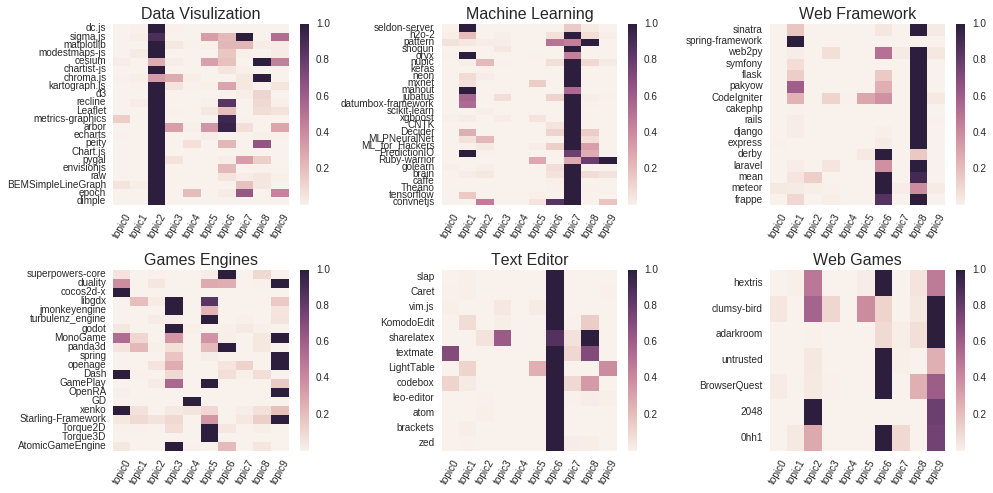

In [85]:
import seaborn as sns
from scipy.spatial.distance import cosine

proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'), index_col=0)

#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())


clusters = pd.merge(projects_details, proj_topic, right_index=True, left_index=True)
clusters.reset_index(inplace=True)
clusters.sort_values('group', inplace=True)
df = clusters#[~projects['index'].isin(to_remove)]
df.set_index('index', inplace=True)
categories = df.groupby('group')
categories.ngroups

f, ax= plt.subplots(2, 3, figsize=(14, 7))#, sharex=True)
   
for i, (name, g) in enumerate(categories):
    x = i%2
    y = int(i/2) 
    print(name)
    sns.heatmap(g.ix[:,2:NUM_TOPICS+2], ax=ax[x][y])#, cmap="RdBu_r", cbar=False)
    ax[x][y].set_title(name, fontsize=16)
    ax[x][y].set_ylabel('')
    labels = ax[x][y].get_xticklabels()
    plt.setp(labels, rotation=60)
    
plt.tight_layout()

plt.savefig('topic_projects_heatmap'+suffix+'.png', bbox_inches='tight', dpi=350)

In [75]:
projects['sum'] = projects.ix[:,2:2+NUM_TOPICS].sum(axis=1)
projects['type'].unique()

NameError: name 'projects' is not defined

## Test 1: Finding similar topics By joining topics based on projects


In [76]:

# mat = clusters[clusters.columns[2:NUM_TOPICS+2]]

# n = mat.shape[1]
# sim = []
# for i in range(n):
#     for j in range(i+1,n):
#         s = 1- cosine(mat[mat.columns[i]], mat[mat.columns[j]])
#         if s > 0.3:
#             sim.append([mat.columns[i], mat.columns[j]])

# print(sim)
# # merge similar columns (topics)
# for row in sim:
#     mat.loc[:, row[0]] = mat[row[0]] + mat[row[1]]

# # drop columns after adding similarities (don't merge with above, can be recursive)
# for row in sim:
#     mat.loc[: ,row[1]] = 0 # empty topic


## Test2: Finding similar topics by joining topics based on their words  ---> better than test 1

In [78]:
threshold = 0.6


mat = topic_word_raw.T

n = mat.shape[1]
sim = []
for i in range(n):
    for j in range(i+1,n):
        s = 1- cosine(mat.ix[:, i], mat.ix[:, j])
        if s > threshold:
            print('topic{}-topic{}: {}'.format(i,j,s))
            sim.append([mat.columns[i], mat.columns[j]])

print(sim)
mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
# merge similar columns (topics)
for row in sim:
    mat.ix[:, row[0]] = mat.ix[:,row[0]] + mat.ix[:,row[1]]
    # drop columns after adding similarities (don't merge with above, can be recursive)
    mat.ix[: ,row[1]] = 0 # empty topic
    mat.replace(row[1], row[0])


topic1-topic8: 0.6129212066098929
[[1, 8]]


/home/doaa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Test 3: # Finding CATEGORIES: joining topics based on their words  ---> topic can belong to many categories


In [164]:
threshold = 0.5

def get_cluster_matrix(mat, sim):
    categ = pd.DataFrame()
    # merge similar columns (topics)
    for row in sim:
        cat_name = str(row[0]) + '_' + str(row[1])
        categ[cat_name] = mat.ix[:,row[0]] + mat.ix[:,row[1]]

    # for unique topics copy as separete category
    for i in range(NUM_TOPICS):
        if unique[i] == 1:
            categ[i] = mat.ix[:, i]
    return categ


mat = topic_word_raw.T
n = mat.shape[1]
sim = []
unique = [1] * NUM_TOPICS
for i in range(n):
    for j in range(i+1,n):
        s = 1 - cosine(mat.ix[:, i], mat.ix[:, j])
        if s > threshold:
            print('topic{}-topic{}: {}'.format(i,j,s))
            sim.append([mat.columns[i], mat.columns[j]])
            # mark topic i and topic j as non unique categories
            unique[i], unique[j] = 0, 0
            

print(sim)
mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
categ = get_cluster_matrix(mat, sim)
    
mat = categ
print(mat.shape)
# mat

topic1-topic8: 0.6129212066098929
topic3-topic5: 0.5613304091194783
topic5-topic9: 0.527327237683313
[[1, 8], [3, 5], [5, 9]]
(103, 8)


# Test 4: Find recirsive categories

In [3]:
# threshold = 0.8
# MAX_CAT = 7


# # ----------------------------------------------------------

# def get_cluster_matrix(mat, sim, unique):
#     categ = pd.DataFrame()
#     # merge similar columns (topics)
#     cat_count = 0
#     for row in sim:
#         #cat_name = str(row[0]) + '_' + str(row[1])
#         categ[cat_count] = mat.ix[:,row[0]] + mat.ix[:,row[1]]
#         cat_count += 1

#     # for unique topics copy as separete category
#     for i, topic_uniq in enumerate(unique):
#         if topic_uniq == 1:
#             categ[i] = mat.ix[:, i]
#             cat_count +=1
#     return categ

# # ----------------------------------------------------------

# sim = []
# categ = topic_word_raw.T
# num_cat = categ.shape[1]
# unique = [1] * num_cat
# while num_cat > MAX_CAT and threshold>0.05:   
#     print('num_cat:', num_cat)
#     for i in range(num_cat):
#         for j in range(i+1,num_cat):
#             s = 1 - cosine(categ.ix[:, i], categ.ix[:, j])
#             if s > threshold:
#                 print('topic{}-topic{}: {}'.format(i,j,s))
#                 sim.append([i, j])
#                 # mark topic i and topic j as non unique categories
#                 unique[i], unique[j] = 0, 0
    
#     # Find categories 
    
#     categ = get_cluster_matrix(categ, sim, unique) 
#     threshold -= 0.05
#     num_cat = categ.shape[1]
#     unique = [1] * num_cat


# print(sim)

# # assign projects to categories
# mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
# mat = get_cluster_matrix(mat, sim, unique) 

# mat

# Remove membership values below a threshould

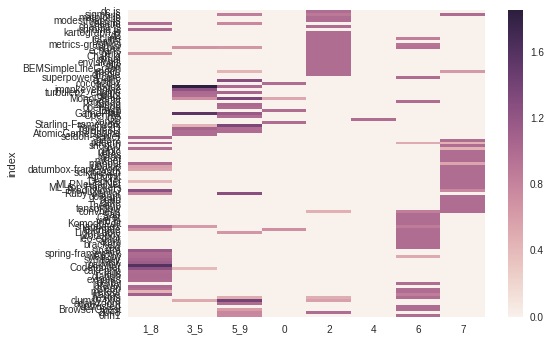

In [165]:
threshold = 0.4
labels = clusters[clusters.columns[0]]
mat = mat.clip_lower(threshold).replace(threshold, 0) # remove values below the threshold
sns.heatmap(mat)
# print(labels)


# Binarize the matrix  (not used)

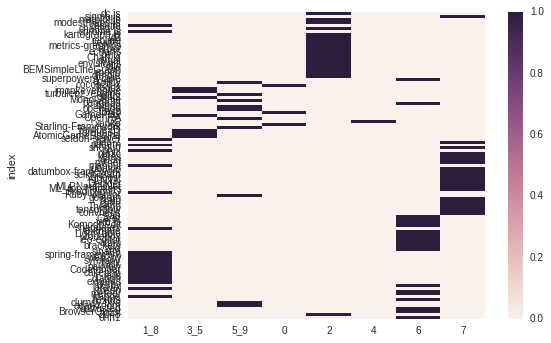

In [166]:
max_clusters = mat.idxmax(axis=1)
bin_mat = mat.copy()
for i in bin_mat.index:
    bin_mat.ix[i,max_clusters[i]] = 100
bin_mat = bin_mat.clip_lower(99).replace(99, 0).replace(100,1) # remove values below the threshold
sns.heatmap(bin_mat)

In [167]:
# num of projects per predicted cluster
num_proj_per_cluster = bin_mat.sum()
num_proj_per_cluster

1_8    21.0
3_5     7.0
5_9    10.0
0       3.0
2      20.0
4       1.0
6      20.0
7      21.0
dtype: float64

In [168]:
# Number of projects per true clusters
labels.value_counts()

Machine Learning     26
Data Visulization    22
Games Engines        20
Web Framework        16
Text Editor          12
Web Games             7
Name: group, dtype: int64

In [169]:
# def precision_soft(index, pred, true):
#     p = 0
#     c_pred_i = pred.loc[index].idxmax() # the column(topics) of max membership
#     c_pred = pred[pred[c_pred_i]==1].index.values # all the cluster of 'index'
#     c_true = true[true==true[index]].index.values # true clutser members
#     intersect = np.intersect1d(c_pred, c_true)
# #     print(intersect)
#     p = intersect.shape[0] / c_pred.shape[0]
#     return p

# def recall_soft(index, pred, true):
#     r = 0
#     c_pred_i = pred.loc[index].idxmax() # the column(topics) of max membership
#     c_pred = pred[pred[c_pred_i]==1].index.values # all the cluster of 'index'
#     c_true = true[true==true[index]].index.values # true clutser members
#     intersect = np.intersect1d(c_pred, c_true)
# #     print(intersect)
#     r = intersect.shape[0] / c_true.shape[0]
#     return r

# Generate clustering accuracy

In [170]:
def precision_soft(index, pred, true):
    p = 0
    intersect = np.arange(0)
    n = 0
    print(index, '--->', pred.loc[index][pred.loc[index]>0].index.values)
    for topic in pred.loc[index][pred.loc[index]>0].index:
        c_pred_i = topic#pred.loc[index].idxmax() # the column(topics) of max membership
        c_pred = pred[pred[c_pred_i]>0].index.values # all the cluster of 'index'
        c_true = true[true==true[index]].index.values # true clutser members
        intersect2 = np.intersect1d(c_pred, c_true)
        if intersect2.shape[0]>intersect.shape[0]:  # choose larger cluster
            intersect = intersect2
            n = c_pred.shape[0]
    
    p = intersect.shape[0] / n if n>0 else 0
    return p


def recall_soft(index, pred, true):
    r = 0
    intersect = np.arange(0)
    for topic in pred.loc[index][pred.loc[index]>0].index:
        c_pred_i = topic#pred.loc[index].idxmax() # the column(topics) of max membership
        c_pred = pred[pred[c_pred_i]>0].index.values # all the cluster of 'index'
        c_true = true[true==true[index]].index.values # true clutser members
        intersect2 = np.intersect1d(c_pred, c_true)
        if intersect2.shape[0]>intersect.shape[0]:  # choose larger cluster
            intersect = intersect2
            
    return intersect.shape[0] / c_true.shape[0]
    
def get_F_score(precision, recall):
    return 2 * precision * recall / (precision+recall)

# ------------------------------------------------------------------

precision = 0
for i in bin_mat.index:
    p = precision_soft(i, mat, labels)
    precision += p

precision = precision/labels.shape[0]
print('precision', precision)

recall = 0
for i in bin_mat.index:
    p = recall_soft(i, mat, labels)
    recall += p

recall = recall/labels.shape[0]
print('recall', recall)

f_score = get_F_score(precision, recall)
print('f score: ', f_score)

dc.js ---> [2]
sigma.js ---> ['5_9' 2 7]
matplotlib ---> [2]
modestmaps-js ---> [2]
cesium ---> ['1_8' '5_9']
chartist-js ---> [2]
chroma.js ---> ['1_8']
kartograph.js ---> [2]
d3 ---> [2]
recline ---> [2 6]
Leaflet ---> [2]
metrics-graphics ---> [2 6]
arbor ---> ['3_5' '5_9' 2 6]
echarts ---> [2]
peity ---> ['1_8' 2]
Chart.js ---> [2]
pygal ---> [2]
envisionjs ---> [2]
raw ---> [2]
BEMSimpleLineGraph ---> [2]
epoch ---> ['5_9' 2 7]
dimple ---> [2]
superpowers-core ---> [6]
duality ---> ['5_9']
cocos2d-x ---> [0]
libgdx ---> ['3_5' '5_9']
jmonkeyengine ---> ['3_5']
turbulenz_engine ---> ['3_5' '5_9']
godot ---> ['3_5']
MonoGame ---> ['3_5' '5_9' 0]
panda3d ---> [6]
spring ---> ['5_9']
openage ---> ['5_9']
Dash ---> [0]
GamePlay ---> ['3_5' '5_9']
OpenRA ---> ['5_9']
GD ---> [4]
xenko ---> [0]
Starling-Framework ---> ['3_5' '5_9']
Torque2D ---> ['3_5' '5_9']
Torque3D ---> ['3_5' '5_9']
AtomicGameEngine ---> ['3_5']
seldon-server ---> ['1_8']
h2o-2 ---> [7]
pattern ---> ['1_8' 6 7]
shogu

In [5]:
# index = 'dc.js'
# c_pred_i = bin_mat.loc[index].idxmax(axis=1) # the column(topics) of max membership
# bin_mat[bin_mat[c_pred_i]==1].index # all the cluster of 'index'
# bin_mat.loc[index][bin_mat.loc[index]>0].index


In [4]:
# labels[labels==labels['dc.js']].index.values